# Summary

Python can be used to create websites, automate tasks, and do numerical analysis. The Python library that is most often used for analysis is called Pandas (short for Panel Analysis).

After completing this tutorial, you will know:
* How to use Pandas DataFrames to open \*.csv and \*.xlsx files
* How to apply functions to DataFrames to calcuate the mean and standard deviation
* How to make basic plots

Let’s get started.

# Tutorial Overview
This tutorial is divided into 2 parts:
1. Pandas basics
2. Exercises: Your turn!

# Pandas basics

**Pandas** is all about **DataFrames** (df), which are analogous to tables in Excel or SQL, or to R's data.frame.  Dataframes are made up of **Series** (i.e. columns) and can be manipulated with simple or complex transformations like filtering, aggregating, joining, and pivoting/unpivoting.

## Read a text file into Pandas as a DataFrame and explore the data

We'll import a sample data set with daily sales in the US marketplace for 2017, grouped by GL and including a column for product family (big4).  To read the text file into memory, we provide the path to the file.  You only need to provide the path relative to the folder that contains your code.  For example, this Jupyter notebook is in a folder called Workbooks.  So when we specify the path as 'Support_Files/sales_fake.txt', Pandas will look for the file called sales_fake.txt inside Workbooks/Support_Files/.  Alternatively, you can always hard code the entire path (e.g. 'C:/some_folder/some_subfolder/sales_fake.txt') if you are unsure how to use relative paths.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read data into Python from .txt
sales = pd.read_csv('data/sales_fake.csv')

In [3]:
# View the first 10 rows of the dataframe (see also: tail)
sales.head(10)

,marketplace_id,order_day,order_week,gl,product_family,units,ops
0,1,2017-01-01,2017-01-07,Amazon_Pantry,Consumables,9460.696331,46576.224274
1,1,2017-01-02,2017-01-07,Amazon_Pantry,Consumables,13828.318507,61148.434296
2,1,2017-01-03,2017-01-07,Amazon_Pantry,Consumables,12308.348366,59960.632711
3,1,2017-01-04,2017-01-07,Amazon_Pantry,Consumables,11912.807101,58991.544654
4,1,2017-01-05,2017-01-07,Amazon_Pantry,Consumables,10817.883315,54032.017658
5,1,2017-01-06,2017-01-07,Amazon_Pantry,Consumables,10585.850959,51928.496274
6,1,2017-01-07,2017-01-07,Amazon_Pantry,Consumables,12170.592881,61172.924939
7,1,2017-01-08,2017-01-14,Amazon_Pantry,Consumables,14468.694255,63383.543121
8,1,2017-01-09,2017-01-14,Amazon_Pantry,Consumables,12385.589620,58211.500811
9,1,2017-01-10,2017-01-14,Amazon_Pantry,Consumables,10700.052752,52852.624223


### Exercise: What do these DataFrame methods do? Try them out.
The .head() **method** above is just one of the many methods that can be applied to Pandas dataframes. In general, these methods return some transformation of the dataframe to which they are applied. Take a few minutes and play around with some of the methods below, using the sales dataframe. 

See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html under "Methods" for a complete list.

Some useful methods: 

    .count()  .describe()  .info()  .mean()  .median()  .nunique()  .plot()  .shift()  .transpose()

Dataframes also have certain **attributes** which are accessed similarly, but without the ().  What do these attributes represent?

    .columns  .dtypes  .empty  .shape  .size  .values

In [4]:
### CODE FOR ABOVE EXERCISE ###




In [5]:
# Select just a single column (i.e. Series object) from a dataframe:
sales['units']

0         9460.696331
1        13828.318507
2        12308.348366
3        11912.807101
4        10817.883315
             ...     
20600     2662.391432
20601     2764.977243
20602     3170.902842
20603     3108.060954
20604     1354.866306
Name: units, Length: 20605, dtype: float64

In [6]:
# The above series isn't very useful by itself, since we lose the date information.  To select a subset of columns, pass in a list of columns:
col_list = ['order_day', 'gl', 'ops']
sales[col_list].head()

# Or equivalently:
sales[['order_day', 'gl', 'ops']].head()

,order_day,gl,ops
0,2017-01-01,Amazon_Pantry,46576.224274
1,2017-01-02,Amazon_Pantry,61148.434296
2,2017-01-03,Amazon_Pantry,59960.632711
3,2017-01-04,Amazon_Pantry,58991.544654
4,2017-01-05,Amazon_Pantry,54032.017658


In [7]:
# What are all the unique product families? use unique() on a single series:
sales['product_family'].unique()

array(['Consumables', 'Softlines', 'Hardlines', 'Media'], dtype=object)

In [8]:
# Or get the count of observations from each product family.  Note that the .value_counts() method only works if applied to a Series - not a DataFrame.  
# What happens if you try to call .value_counts() on a DataFrame?
sales['product_family'].value_counts()

Hardlines      10608
Consumables     5455
Media           2582
Softlines       1960
Name: product_family, dtype: int64

In [9]:
# Print the total sales for the year.  The .sum() method works on both Series and DataFrames.
sales['ops'].sum()

5441037303.093659

In [10]:
# Operations on the series that make up a dataframe generally work as you'd expect.

# E.g. add a column for country
sales['country'] = 'US'

sales.head()

,marketplace_id,order_day,order_week,gl,product_family,units,ops,country
0,1,2017-01-01,2017-01-07,Amazon_Pantry,Consumables,9460.696331,46576.224274,US
1,1,2017-01-02,2017-01-07,Amazon_Pantry,Consumables,13828.318507,61148.434296,US
2,1,2017-01-03,2017-01-07,Amazon_Pantry,Consumables,12308.348366,59960.632711,US
3,1,2017-01-04,2017-01-07,Amazon_Pantry,Consumables,11912.807101,58991.544654,US
4,1,2017-01-05,2017-01-07,Amazon_Pantry,Consumables,10817.883315,54032.017658,US


In [11]:
# Adding calculated columns is easy, too.  First, calculate the ASP and print the results:
sales['ops'] / sales['units']

0        4.923129
1        4.421972
2        4.871542
3        4.951943
4        4.994694
           ...   
20600    2.381879
20601    2.230902
20602    2.216904
20603    2.073844
20604    2.313887
Length: 20605, dtype: float64

#### Mini exercise: add the ASP, as calculated above, to the sales dataframe as a series called asp ###

In [12]:
### CODE FOR ABOVE EXERCISE ###


## Filtering with row conditions
The .loc() method is highly useful for filtering dfs.  You can think of the condition(s) inside .loc as being roughly equivalent to the "ifs" in Excel's sumifs function, or the conditions in a WHERE clause in SQL.

In [13]:
# Filter only for the pantry GL and name this view pantry:
pantry = sales.loc[sales['gl'] == 'Amazon_Pantry']
pantry.head()

,marketplace_id,order_day,order_week,gl,product_family,units,ops,country
0,1,2017-01-01,2017-01-07,Amazon_Pantry,Consumables,9460.696331,46576.224274,US
1,1,2017-01-02,2017-01-07,Amazon_Pantry,Consumables,13828.318507,61148.434296,US
2,1,2017-01-03,2017-01-07,Amazon_Pantry,Consumables,12308.348366,59960.632711,US
3,1,2017-01-04,2017-01-07,Amazon_Pantry,Consumables,11912.807101,58991.544654,US
4,1,2017-01-05,2017-01-07,Amazon_Pantry,Consumables,10817.883315,54032.017658,US


In [14]:
# to add multiple conditions, wrap each condition in () and combine them together with &

sales.loc[(sales['order_day'] == '2017-07-01') & (sales['gl'] == 'Apparel')]

,marketplace_id,order_day,order_week,gl,product_family,units,ops,country
546,1,2017-07-01,2017-07-01,Apparel,Softlines,28386.369567,561085.865088,US


### Exercise: Filter the sales df for Halloween (i.e. order_day is '2017-10-31'), and for the Consumables product_family

In [15]:
### CODE FOR ABOVE EXERCISE ###




## Basic visualizations

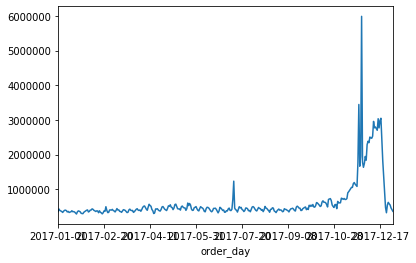

In [16]:
# In the background, Pandas uses a Python package called matplotlib to make plotting convenient.
# Since our toys df is indexed on date, Pandas automatically treats date as the x-axis.

toys = sales[sales['gl']=='Toys'].copy()
toys.set_index('order_day', inplace=True)
toys['ops'].plot()

### Exercise: what other kinds of plots can Pandas produce? Try making a few below.
Check out the API documentation for the pd.Series.plot method to find other allowable values of the "kind" argument:

http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.plot.html

In [17]:
### CODE FOR ABOVE EXERCISE ###




array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e3e6d90>,
      dtype=object)

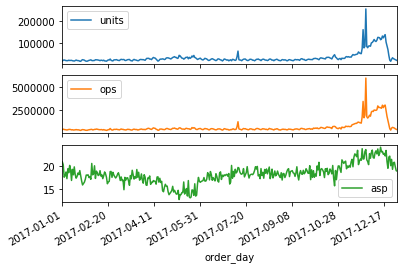

In [18]:
# Or we can plot multiple metrics with a shared axis using subplots=True.
# With a single line of code, Pandas can create detailed visualizations
toys['asp'] = toys['ops'] / toys['units']
toys[['units', 'ops', 'asp']].plot(subplots=True)

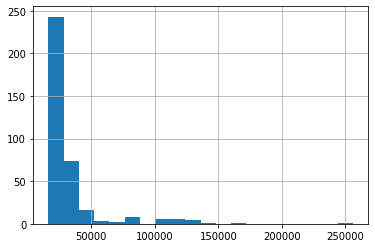

In [19]:
# Histograms are simple to create

toys['units'].hist(bins=20)

## Exporting Data

In [20]:
# If you want to export a DataFrame back to a text file, the syntax to do this is similar to pd.read_csv().
# First, define the path / location where you want the file to be saved (including the filename):

path_to_save_data = 'data/sales_fake_output.csv'

sales.to_csv(path_to_save_data, index=False)

In [21]:
# Sometimes you might want to quickly look at the data in Excel.  
# Add it to the clipboard and paste it wherever you want!

sales.to_clipboard()

In [22]:
sales.gl.unique()

array(['Amazon_Pantry', 'Apparel', 'Art', 'Art and Craft Supplies',
       'Automotive', 'Baby', 'Beauty', 'Biss', 'Books', 'Camera',
       'Consumables_Email_Gift_Cards', 'Consumables_Physical_Gift_Cards',
       'Electronics', 'Entertainment Collectibles', 'Food and Beverage',
       'Furniture', 'GUILD', 'Gift Card', 'Gourmet', 'Grocery',
       'Health & Personal Care', 'Home', 'Home Entertainment',
       'Home Improvement', 'Jewelry', 'Kitchen', 'Lawn and Garden',
       'Loose Stones', 'Luggage', 'Luxury Beauty', 'Magazines',
       'Major Appliances', 'Misc SDP', 'Mobile_Electronics', 'Music',
       'Musical Instruments', 'Office Products', 'Outdoors', 'PC',
       'Personal_Care_Appliances', 'Pet Products', 'Prescription_Drugs',
       'Prescription_Eyewear', 'Shoes', 'Softlines Private Label',
       'Software', 'Sports', 'Sports Memorabilia', 'Tires', 'Tools',
       'Toys', 'Universal', 'VALUE_ADDED_SERVICES', 'Video', 'Video DVD',
       'Video Games', 'Watches', 'Wine',

# Exercises: Your turn!

Use the sales DataFrame to answer the following questions.

In [23]:
# First read in the data
sales = pd.read_csv('data/sales_fake.csv')

1) What is the total OPS from all rows?

2) Display the top 5 rows of the Apparel GL

3) Plot a line graph of the Apparel units by day

4) How many unique GLs are there?

5) Filter dataset for only Pet Products. Plot one graph with a line for each of units, ops and asp by day

6) Create a new dataframe called "last_day" that contains only rows from the last order_day in the dataset

7) Output the result above to an excel file called "test_output.xlsx"

# Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.
* Describe three examples when Pandas would be better than using Excel.
* Complete the next example that uses Pandas to import and visualize a dataset. 

# Further Reading
This section provides more resources on the topic if you are looking to go deeper.

## Books
* Python for Data Analysis, by William McKinney. http://shop.oreilly.com/product/0636920023784.do

## APIs
* Pandas. https://pandas.pydata.org/

## Additional Pandas Tutorials
* [Python for Quantitative Economics](https://github.com/QuantEcon/lecture-python-programming.notebooks/blob/master/pandas.ipynb)
* [Intro to Pandas](https://github.com/kthyng/python4geosciences/blob/master/materials/4_pandas.ipynb) from Python for Geosciences
    
# Summary

In this tutorial, you were introduced to the Pandas library. Specifically, you learned:
* How to use Pandas DataFrames to open \*.csv and \*.xlsx files
* How to apply functions to DataFrames to calcuate the mean and standard deviation
* How to make basic plots

# Next

In the next section, you will use Pandas to import and work with data. 